# Определение перспективного тарифа для телеком компании


Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


# План исследования

Шаг I. Просмотр общей информации и изучение данных.

Шаг II. Предобработка данных:

    1. Изменение типа данных.
    2. Обработка и округление данных по столбцам с длительностью звонков и объемом потраченного трафика.
    3. Подсчет значений для каждого пользователя.

Шаг III. Анализ данных:

    1.Посчитаны статистические параметры для каждого пользователя.
    2.Построение гистограмм и описание распределений.

Шаг IV. Проверка поставленных гипотез:

    1.Посчитана и отображена на графике средняя выручка от пользователей тарифов «Ультра» и «Смарт».
    2.Проверка гипотезы о равенстве двух совокупностей.
    2.Посчитана и отображена на графике средняя выручка от пользователей из Москвы и других регионов.
    3.Проверка гипотезы о равенстве двух совокупностей.

## Просмотр общей информации и изучение данных.

In [1]:
#Загрузка необходимых библиотек
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from scipy import stats as st
import numpy as np

pd.options.display.max_rows = 100

#Прочитаем данные из файлов и выведем их на экран
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

print('\x1b[1;94m'+'Просмотр таблицы с информацией о телефонных звонках'+'\x1b[0m')
display(df_calls.head(30))
print('')

print('\x1b[1;94m'+'Просмотр таблицы с информацией об использовании интернета'+'\x1b[0m')
display(df_internet.head(30))
print('')

print('\x1b[1;94m'+'Просмотр таблицы с информацией о сообщениях'+'\x1b[0m')
display(messages.head(20))
print('')

print('\x1b[1;94m'+'Просмотр таблицы с информацией о тарифах'+'\x1b[0m')
display(tariffs.head(30))
print('')

print('\x1b[1;94m'+'Просмотр таблицы с информацией о пользователях'+'\x1b[0m')
display(users.head(30))
print('')

print('\x1b[1;94m'+'Общая информация по таблицам'+'\x1b[0m')
print('')

#Вывод общей информации и статистических показателей по таблицам:
for df in [df_calls, df_internet, messages, tariffs, users]: 
    display(df.info())
    display(df.describe())


Просмотр таблицы с информацией о телефонных звонках


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000



Просмотр таблицы с информацией об использовании интернета


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000



Просмотр таблицы с информацией о сообщениях


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000



Просмотр таблицы с информацией о тарифах


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Просмотр таблицы с информацией о пользователях


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart



Общая информация по таблицам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


### Вывод

В таблицах представлена информация о звонках, сообщениях, об интернет-сессиях по выборке из 500 пользователей. Присутствуют нулевые значения в столбце 'длительность звонков','объем потраченного интернет-трафика в мбайт', пропущены значения по столбцу  'дата прекращения пользования тарифом'.Необходимо проанализировать и обработать данные. 
Столбцы с информацией о времени в дальнейшем нужно заменить со строчного типа на временной.

## Предобработка данных.

### Изменение типа данных.

In [2]:
#Изменение типов данных:

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

#Проверка:
print('\x1b[1;94m'+'Новые типы данных:'+'\x1b[0m')
for df in [df_calls,df_internet,messages,users]:
    print(df.dtypes)

Новые типы данных:
id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object
Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object
id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object
user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object


#### Вывод

Типы признаков, где были указаны даты, заменены со строчного типа на временной.В дальнейшем с этим типом данных можно будет проводить вычисления.  

### Обработка нулевых значений по столбцу 'Длительность звонка в минутах'

In [3]:
#Найдём количество нулевых значений по столбцу 'Длительность звонка в минутах:'
print('\x1b[1;94m'+'Кол-во звонков с длительностью звонка 0 минут:'+'\x1b[0m')
print(len(df_calls[df_calls['duration'] == 0]))
print('')



#Найдём процентное соотношение нулевых значений к общему кол-ву звонков
ratio_zero_to_total_duration = len(df_calls[df_calls['duration'] == 0]) / len(df_calls)
print('\x1b[1;94m'+'Процентное соотношение нулевых значений общему кол-ву звонков - {:.1%}'.format(ratio_zero_to_total_duration) +'\x1b[0m')
print('')



#Отношение звонков с 0 продолжительностью к общему числу звонков за месяц:
df_calls['month'] = df_calls['call_date'].dt.month

df_calls_only_zero_duration = df_calls.loc[df_calls['duration'] == 0]

print('\x1b[1;94m'+'Отношение звонков с 0 длительностью ко всем остальным звонкам за месяц:'+'\x1b[0m')
ratio = round(((df_calls_only_zero_duration.groupby('month')['duration'].count() / df_calls.groupby('month')['duration'].count())*100))                       
print(ratio)
print('')


#Создание новой таблицы без звонков с длительностью 0 минут
calls = df_calls.drop(np.where(df_calls['duration'] == 0)[0])



#Сравнение показателей статистики по данным со звонками с длительностью 0 и без них. 
print('\x1b[1;94m'+'Описательная статистика по всем звонкам по месяцам:'+'\x1b[0m')
print(df_calls.describe(include=['float']))
print('')

print('\x1b[1;94m'+'Описательная статистика без звонков с длительностью 0:'+'\x1b[0m')
print(calls.describe(include=['float']))
print('')


Кол-во звонков с длительностью звонка 0 минут:
39613

Процентное соотношение нулевых значений общему кол-ву звонков - 19.6%

Отношение звонков с 0 длительностью ко всем остальным звонкам за месяц:
month
1     21.0
2     19.0
3     20.0
4     19.0
5     20.0
6     20.0
7     19.0
8     20.0
9     19.0
10    20.0
11    20.0
12    19.0
Name: duration, dtype: float64

Описательная статистика по всем звонкам по месяцам:
            duration
count  202607.000000
mean        6.755887
std         5.843365
min         0.000000
25%         1.300000
50%         6.000000
75%        10.700000
max        38.000000

Описательная статистика без звонков с длительностью 0:
            duration
count  162994.000000
mean        8.397794
std         5.353022
min         0.010000
25%         4.170000
50%         7.740000
75%        11.850000
max        38.000000



### Построение диаграмм размаха для показателя "Длительность звонка"

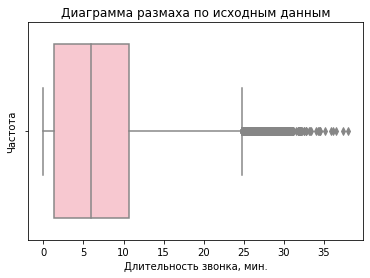

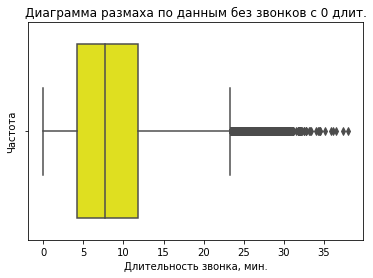

In [4]:
#Построение диаграмм размаха для наглядности:
sns.boxplot(data=df_calls, x='duration', color = 'pink');
plt.title("Диаграмма размаха по исходным данным")
plt.xlabel("Длительность звонка, мин.")
plt.ylabel("Частота")
plt.show();

sns.boxplot(data=calls, x='duration', color = 'yellow');
plt.title("Диаграмма размаха по данным без звонков с 0 длит.")
plt.xlabel("Длительность звонка, мин.")
plt.ylabel("Частота")
plt.show();


### Округление данных по столбцу "Длительность звонка"

In [5]:
#Округление данных
calls['duration'] = np.ceil(calls['duration'])

display(calls.head(20))

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
10,1000_10,2018-08-22,6.0,1000,8
11,1000_11,2018-05-28,19.0,1000,5
12,1000_12,2018-07-05,3.0,1000,7
13,1000_13,2018-09-29,8.0,1000,9
14,1000_14,2018-12-11,10.0,1000,12


#### Вывод

Количество звонков с нулевой продолжительностью - 39613, что составляет 19.6%. По месяцам звонки распределены равномерно, следовательно их возникновение систематическое, это не связано с ошибками в данных. Принято решение посчитать их недозвонами и удалить. Далее с помощью метода describe можно увидеть, что среднее значение увеличилось с 6.8 до 8.4, медиана с 6 до 7.7.Построены диаграммы размаха для наглядности. 
Так как "Мегалайн" округляет значения минут вверх, применен метод округления к столбцу с длительностью звонков. 

### Обработка нулевых значений по столбцу 'Объём потраченного за сессию интернет-трафика '

In [6]:
#Найдём количество нулевых значений по столбцу 'Объём потраченного за сессию интернет-трафика (в мегабайтах)'
print('\x1b[1;94m'+'Кол-во нулевых значений по данным по объёму потраченного трафика:'+'\x1b[0m')
print(len(df_internet[df_internet['mb_used'] == 0]))
print('')




#Найдём процентное соотношение нулевых значений к общему кол-ву звонков
ratio_zero_to_total_duration = len(df_internet[df_internet['mb_used'] == 0]) / len(df_internet)
print('\x1b[1;94m'+'Процентное соотношение нулевых значений общему кол-ву - {:.1%}'.format(ratio_zero_to_total_duration) +'\x1b[0m')
print('')



#Отношение нулевых значений потраченного трафика к общему кол-ву :
df_internet['month'] = df_internet['session_date'].dt.month

df_internet_only_zero = df_internet.loc[df_internet['mb_used'] == 0]

print('\x1b[1;94m'+'Отношение 0 значений к общему кол-ву потраченного объёма трафика за месяц'+'\x1b[0m')
ratio = round(((df_internet_only_zero.groupby('month')['mb_used'].count() / df_internet.groupby('month')['mb_used'].count())*100))                       
print(ratio)
print('')

 
    
#Создание новой таблицы без звонков с длительностью 0 минут
internet = df_internet.drop(np.where(df_internet['mb_used'] == 0)[0])



#Округление данных
internet['mb_used'] = np.ceil(internet['mb_used'])

display(internet.head(20))


Кол-во нулевых значений по данным по объёму потраченного трафика:
19598

Процентное соотношение нулевых значений общему кол-ву - 13.1%

Отношение 0 значений к общему кол-ву потраченного объёма трафика за месяц
month
1     14.0
2     14.0
3     13.0
4     13.0
5     13.0
6     13.0
7     13.0
8     13.0
9     13.0
10    13.0
11    13.0
12    13.0
Name: mb_used, dtype: float64



,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1198.0,2018-06-25,1000,6
3,3,1000_3,551.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9
5,5,1000_5,400.0,2018-10-02,1000,10
6,6,1000_6,541.0,2018-09-07,1000,9
7,7,1000_7,416.0,2018-07-11,1000,7
8,8,1000_8,506.0,2018-10-08,1000,10
9,9,1000_9,346.0,2018-09-03,1000,9


#### Вывод

Количество интернет-сессий с нулевой продолжительностью - 19598, что составляет 13.1%. Каждый месяц нулевых значений примерно одинаковый процент, это значит, что они распределены равномерно. Вероятнее всего, причина появлений нулевых значений в том, что пользователь пытался подключиться к интернету, но интернет-соединение не было установлено, либо сразу сброшено. Принято решение  удалить такие значения. 
Так как "Мегалайн" округляет значения мегабайтов вверх, применен метод округления к столбцу с объёмом потраченного за сессию интернет-трафика. 

### Подсчет значений для каждого пользователя


#### Количество сделанных звонков и израсходованных минут разговора по месяцам;    количество отправленных сообщений по месяцам;   объем израсходованного интернет-трафика по месяцам

In [7]:
# Добавление столбца месяц
messages['month'] = messages['message_date'].dt.month


# Количество сделанных звонков и израсходованных минут разговора по месяцам:
calls_data = calls.groupby(['user_id', 'month'], as_index = False).agg({'id':'count','duration':'sum'})
calls_data.columns = ['user_id', 'month', 'calls_total','minutes_sum' ]

#Количество отправленных сообщений по месяцам:
messages_data = messages.groupby(['user_id', 'month'], as_index = False)['id'].count()
messages_data.columns = ['user_id', 'month', 'messages_sum']

#Объем израсходованного интернет-трафика по месяцам:
internet_data = internet.groupby(['user_id', 'month'], as_index = False)['mb_used'].sum()
internet_data.columns = ['user_id', 'month', 'mb_used_total']

#Объединение сгрупированных таблиц
data_1 = calls_data.merge(messages_data, on=['user_id', 'month'], how = 'outer')
data_2 = data_1.merge(internet_data, on=['user_id', 'month'], how = 'outer')
data = data_2.merge(users, on=['user_id'], how = 'left')

#Замена пропущенных значений
data['calls_total'].fillna(0,inplace=True)
data['minutes_sum'].fillna(0,inplace=True)
data['messages_sum'].fillna(0,inplace=True)
data['mb_used_total'].fillna(0,inplace=True)

display(data.head(20))

tariffs = tariffs.set_index('tariff_name')

,user_id,month,calls_total,minutes_sum,messages_sum,mb_used_total,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10,44.0,350.0,73.0,14717.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11,37.0,338.0,58.0,14768.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12,38.0,333.0,70.0,9827.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11,45.0,430.0,0.0,18452.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,47.0,414.0,0.0,14053.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart


#### Вывод

При объединении таблиц появились пропущенные значения. Это связано с тем, что конкретный пользователь мог не пользоваться какой-либо из представленных услуг в конкретный месяц (н-р не отправлять сообщения). 

### Подсчет помесячной выручки с каждого пользователя


In [8]:
def month_payment_calculation(row):
       
    minutes_month = row['minutes_sum']
    messages_month = row['messages_sum']
    internet_month = row['mb_used_total']
    tariff = row['tariff']
   
    # Достанем из таблицы тарифов данные
    minutes_lim = tariffs.loc[tariff, 'minutes_included']
    text_lim = tariffs.loc[tariff, 'messages_included']
    inter_lim = tariffs.loc[tariff, 'mb_per_month_included']
   
    # Вычисляем переплату по звонкам
    calls_overlim = max(minutes_month - minutes_lim, 0)
    calls_overpay = calls_overlim * tariffs.loc[tariff, 'rub_per_minute']
   
    # Вычисляем переплату по интернету, перевод в Гб
    inter_overlim = max(internet_month - inter_lim, 0)
    inter_overpay = (inter_overlim / 1024) * tariffs.loc[tariff, 'rub_per_gb']
 
    # Вычисляем переплату по сообщениям
    text_overlim = max(messages_month - text_lim, 0)
    text_overpay = text_overlim * tariffs.loc[tariff, 'rub_per_message']
 
    # Достанем из таблицы с тарифами абонентскую плату за месяц
    month_fee = tariffs.loc[tariff, 'rub_monthly_fee']
   
    revenue_month = calls_overpay + inter_overpay + text_overpay + month_fee
 
    return revenue_month
 
data['revenue'] = data.apply(month_payment_calculation, axis=1)    
    
display(data.head(10))    

,user_id,month,calls_total,minutes_sum,messages_sum,mb_used_total,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
5,1000,10,44.0,350.0,73.0,14717.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
6,1000,11,37.0,338.0,58.0,14768.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
7,1000,12,38.0,333.0,70.0,9827.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.00000
8,1001,11,45.0,430.0,0.0,18452.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,1153.90625
9,1001,12,47.0,414.0,0.0,14053.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,550.00000


## Анализ данных.

### Подсчет среднего кол-ва минут разговора, сообщений, использованых мб по каждому тарифу за месяц. Добавление значений: дисперсия и стандартное отклонение

,mean_dur_calls,std_dur_calls,var_dur_calls,mean_mess_sum,std_mess_sum,var_mess_sum,mean_mb_sum,std_mb_sum,var_mb_sum
tariff,,,,,,,,,
smart,417.9,190.3,36219.3,33.4,28.2,796.8,16229.2,5877.6,34545911.1
ultra,526.6,317.6,100873.6,49.4,47.8,2285.3,19486.9,10096.3,101935621.0



Диаграммы размаха


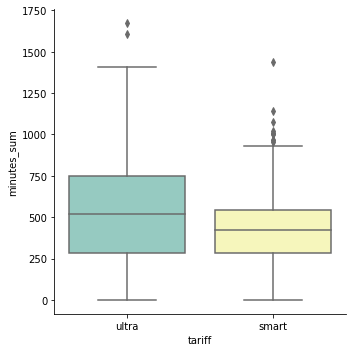

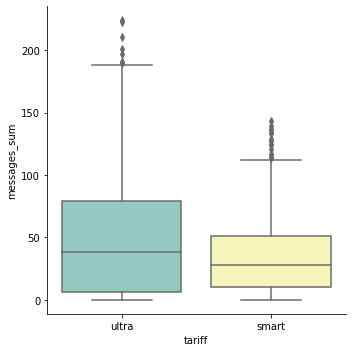

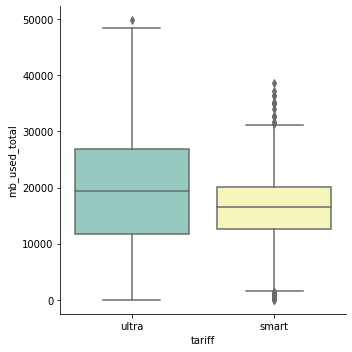

In [9]:
grouped_data = ((round(data.groupby('tariff')['minutes_sum','messages_sum','mb_used_total']
        .agg([np.mean, lambda x: np.std(x, ddof=1),lambda y:np.var(y,ddof=1)]),1)))

grouped_data.columns = ['mean_dur_calls', 'std_dur_calls', 'var_dur_calls','mean_mess_sum', 'std_mess_sum',
                       'var_mess_sum','mean_mb_sum', 'std_mb_sum', 'var_mb_sum']
display(grouped_data)


print('')
print('\x1b[1;94m'+'Диаграммы размаха'+'\x1b[0m')
for column in ['minutes_sum', 'messages_sum','mb_used_total']:    
    sns.catplot(x="tariff", y=column, kind="box", data=data, orient='v', palette='Set3')

#### Вывод

Исходя из полученных данных, видно, что дисперсия по всем трем характеристикам больше по тарифу "Ultra", что означает, что разброс случайных значений выше, значения не однородны. Это означает, что некоторые пользователи тарифа "Ultra" могут совсем не пользоваться какими-то услугами, а другие пользователи использовать аномально много (использовать 1300 минут в месяц,50000 мб трафика).  
Небольшое стандартное отклонение можно наблюдать по данным по тарифу "Smart", значения в выборке близки к среднему арифметическому. Значения средней и медианы также не сильно отличаются, что означает, что в распределении нет слишком больших/маленьких значений, которые бы повлияли на среднее. 

### Построение гистограмм для среднего кол-ва минут разговора, сообщений, использованых мб по каждому тарифу за месяц.

Text(0.5, 1.0, "Распределение по столбцу 'Количество использованных пользователями минут за месяц'")

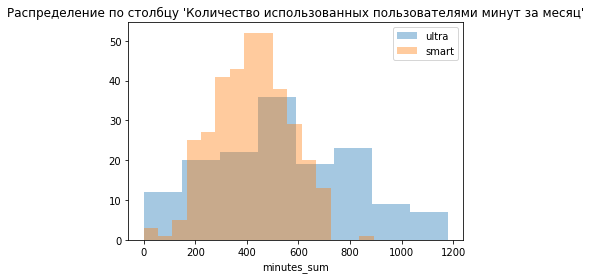

In [10]:
new_data = data.pivot_table(index=['user_id','tariff'], values=['minutes_sum', 'messages_sum', 'mb_used_total', 'revenue'])

sns.distplot(new_data.query('tariff == "ultra"')['minutes_sum'], kde=False)
sns.distplot(new_data.query('tariff == "smart"')['minutes_sum'], kde=False)
plt.legend(['ultra', 'smart'])
plt.title("Распределение по столбцу 'Количество использованных пользователями минут за месяц'")

Text(0.5, 1.0, "Распределение по столбцу 'Количество отправленных пользователями сообщений за месяц'")

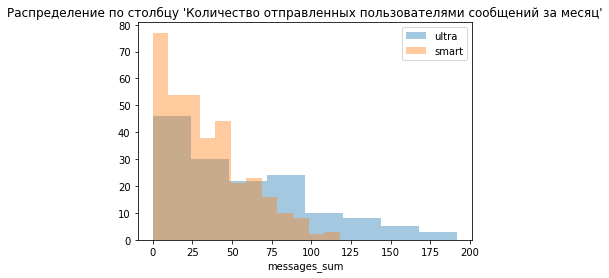

In [11]:
sns.distplot(new_data.query('tariff == "ultra"')['messages_sum'], kde=False)
sns.distplot(new_data.query('tariff == "smart"')['messages_sum'], kde=False)
plt.legend(['ultra', 'smart'])
plt.title("Распределение по столбцу 'Количество отправленных пользователями сообщений за месяц'")

Text(0.5, 1.0, "Распределение по столбцу 'Количество использованного трафика за месяц'")

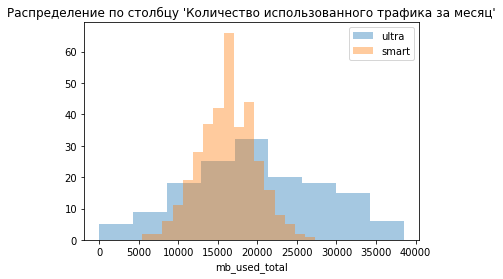

In [12]:
sns.distplot(new_data.query('tariff == "ultra"')['mb_used_total'], kde=False)
sns.distplot(new_data.query('tariff == "smart"')['mb_used_total'], kde=False)
plt.legend(['ultra', 'smart'])
plt.title("Распределение по столбцу 'Количество использованного трафика за месяц'")

#### Вывод

По характеристике "Среднее кол-во минут разговора за месяц" можно наблюдать симметричный набор данных. По тарифу Смарт чаще всего люди проговаривают около 500 минут (бесплатный лимит). По тарифу Ультра частота находится правее. Остальные данные разбросаны симметричны относительно моде. 
Данные по столбцу 'Количество отправленных пользователями сообщений за месяц' скошены вправо, что означает, что есть пользователи в обоих тарифах, которые отправляют аномально много сообщений в месяц. 
График по данным из столбца 'Количество использованного трафика за месяц' по тарифу "Смарт" симметричен.Наивысшая частота оказывается в середине и постепенно снижается к обоим концам. По тарифу "Ультра" имеет небольшую скошенность в положительную  сторону.

## Проверка поставленных гипотез

### Подсчет средней выручки от пользователей тарифов «Ультра» и «Смарт»

,revenue
tariff,
smart,959.898438
ultra,1950.000000


<function matplotlib.pyplot.show(*args, **kw)>

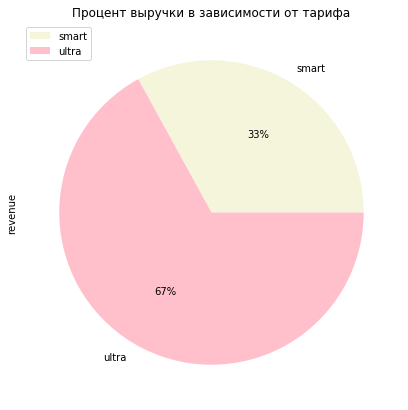

In [13]:
grouped_data = data.pivot_table(index=['tariff'], values=['revenue'],aggfunc='median')
display(grouped_data)
#Построим круговую диаграмму:
grouped_data.plot(kind='pie',x='tariff', y='revenue', figsize = (7,7), title= 'Процент выручки в зависимости от тарифа',
                  autopct='%1.0f%%',colors = ['beige', 'pink'])
plt.show

### Проверка гипотезы о равенстве средних двух генеральных совокупностей

In [14]:
#Фильтр данных по тарифу
ultra = data.query('tariff == "ultra"')['revenue']
smart = data.query('tariff == "smart"')['revenue']

#Ho - Средняя выручка от пользователей тарифа Ультра равна средней выручке пользователей тарифа Смарт

#H1 - Средняя выручка от пользователей тарифа Смарт отличается от средней выручки пользователей тарифа Ультра

#Проверка гипотезы о равенстве средних двух независимых неравных совокупностей:
alpha = .05

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.931402711368788e-296
Отвергаем нулевую гипотезу


#### Вывод

На основании подсчёта медианы и круговой диаграммы, можно сделать вывод, что средние значения по выручке зависят от тарифов и отличаются в почти 2 раза.Применялся критерий Стьюдента для проверки равенства средних значений в двух выборках. Нулевая гипотеза о равенстве данных была отвергнута.

### Подсчет средней выручки пользователей из города Москвы и других регионов

<function matplotlib.pyplot.show(*args, **kw)>

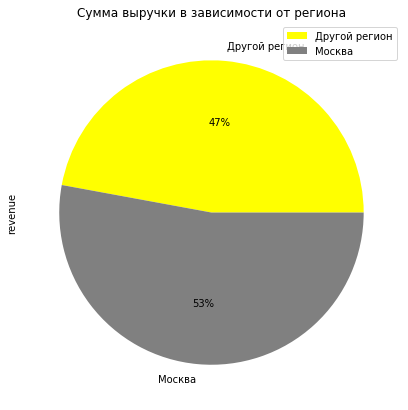

In [15]:
#Функция для разделения городов на две категории: Москва и Другие регионы
def msk_or_region(city):
    if city == 'Москва': 
        return 'Москва'
    else: 
        return 'Другой регион'
    
data['region'] = data['city'].apply(msk_or_region)
ax = data.pivot_table(index=['region'], values=['revenue'], aggfunc='median')

#Построим круговую диаграмму:
ax.plot(kind='pie', x='region', y='revenue', figsize = (7,7), title= 'Сумма выручки в зависимости от региона',
        autopct='%1.0f%%', colors = ['yellow', 'grey'])
plt.show


### Проверка гипотезы о равенстве средних двух генеральных совокупностей

In [16]:
moscow = data.query('region == "Москва"')['revenue']
regions = data.query('region != "Москва"')['revenue']

#Проверка равенства дисперсий

variance_estimate_msc = np.var(moscow, ddof=1)
print(variance_estimate_msc)

variance_estimate_regions = np.var(regions, ddof=1)
print(variance_estimate_regions)


#Ho - Средняя выручка с пользователей в городе Москва равна средней выручке от пользователей других регионов

#H1 - Средняя выручка с пользователей в городе Москва отличается от средней выручки от пользователей других регионов

#Проверка гипотезы о равенстве средних двух независимых неравных совокупностей:

alpha = .05

results = st.ttest_ind(
    moscow, 
    regions, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



547242.7498927494
630503.8546346537
p-значение: 0.4549775646471024
Не получилось отвергнуть нулевую гипотезу


### Вывод

На основании подсчёта медианы и круговой диаграммы, можно сделать вывод, что средние значения по выручке не зависят от расположения пользователей.Применялся критерий Стьюдента для проверки равенства средних значений в двух выборках. Нулевую гипотезу о равенстве данных не удалось отвергнуть.

## Общий Вывод

По тарифу «Смарт»:
При ежемесячной плате в 550 рублей в среднем пользователь тарифа "Смарт" переплачивает около 410 рублей. 
Обычно пользователям хватает предоставленного пакета услуг по минутам разговора и количеству сообщений, но не хватает 15Гб интернет-трафика. 

По тарифу «Ультра»:
Пользователи тарифа "Ультра" укладываются в предоставляемый пакет услуг, но используют его не в полном объеме. Из предоставленных 3000 минут, в среднем используется 526; из 1000 сообщений - 50; из 30 Гб трафика - 20Гб. 

Доходы от пользователей в г. Москва не отличаются от доходов пользователей в других регионах. 

Тариф "Ультра" приносит компании "Мегалайн" больше денег, чем тариф "Смарт".